## Bike Sharing Assignment
### Linear Regression
### Submitted By - Soumya P Parida

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Output Required:
. Which variables are significant in predicting the demand for shared bikes. <br/>
. How well those variables describe the bike demands

### Loading the data and checking the columns/structure

In [3]:
bs_data = pd.read_csv("day.csv")
bs_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
print("Shape:", bs_data.shape)
print("Column Info: ")
print(bs_data.info())
bs_data.describe()

Shape: (730, 16)
Column Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Findings from first look at the data
. The data set seems to be well processed.<br/>
. There are no null/NaN values to rectify or remove in any columns. <br/>
. All values are evenly distributed, the ranges * hardly show any outlier * values for any columns. <br/>
. The instant field is the index, and matches with the inbuilt index. IT can be dropped. <br/>
. The dteDay does not look useful, since the weekday/month/yr, useful values are available on other columns. <br/>
. The casual/registered columns add upto cnt which is the target column. However we may want to find each individual values to see how they mught be affected. Keeping the columns for now. <br/>
. The categorical values would need to be converted to object types for linear regression.

In [5]:
# Dropping unnecesary columns
bs_data.drop(columns=['instant', 'dteday'], inplace=True)

### Perform EDA to understand various variables 
#### We start with a correlation matrix and heat map to verify the correlation present between X's and Ys (casula/registered/cnt)

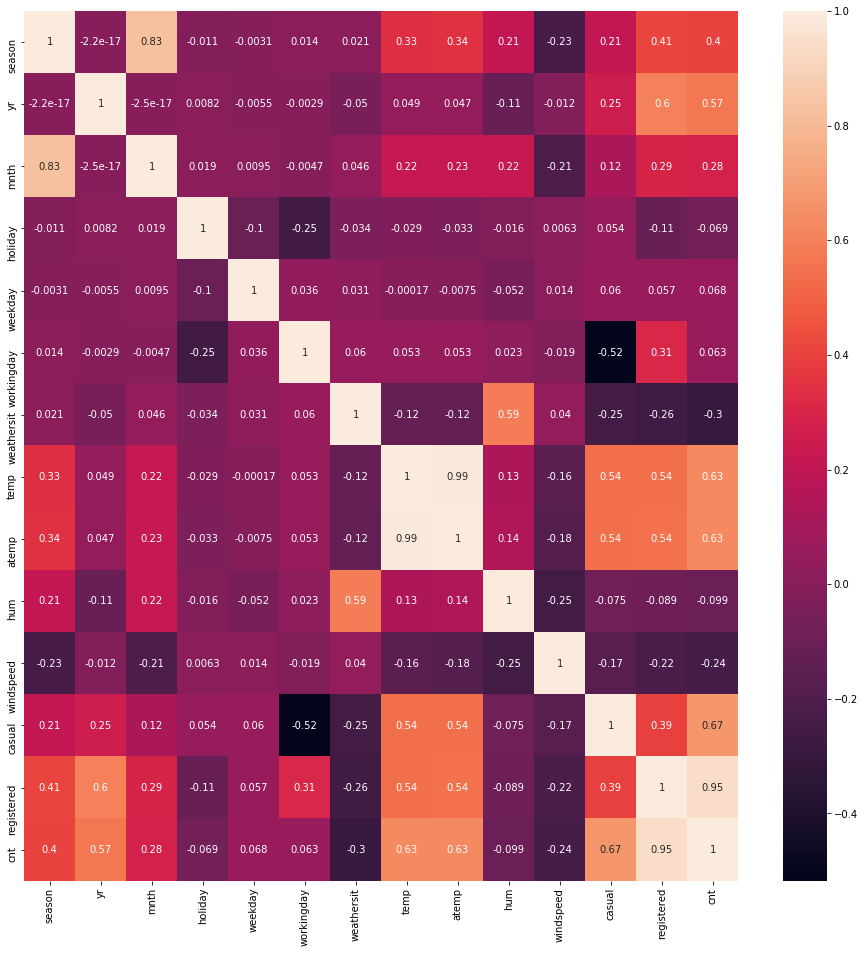

In [6]:
bs_corr = bs_data.corr()
plt.figure(figsize = (16,16))
sns.heatmap(bs_corr, annot=True)
plt.show()

### Check the correlation between the variables
. Correlation with Y <br/>
. Collinearity

### Correlation Findings
#### Y-Y Correlation
. As predicted, Casual/Registered Values are higly correlated with Cnt. <br/>
. Registered has 0.95 correlation value, which suggests that we may drop the column completely.

#### X-X Correlation
. Month and Season values are highly correlated, which are understandable. We may be able to drop the season, since month value is more detailed.<br/>
. The temp/atemp/hum values are also somewhat related to the month/season which also is understandable. But the values should be retained.<br/>
. The holiday and workingday columns are inversely related.<br/>
. temp and atemp are highly correlated, almost equal to 1. This suggests we can certainly drop one column. We will retain temp column.<br/>

#### X-Y Correlation
. The cnt value is correlated to the values for season/yr/month/temp <br/>
. The cnt value is inversely correlated to the values for weathersit and windspeed. <br/>
. The casual/registered value although follow a similar pattern, we see casual is highly inversely correlated to the workingday column, whereas registered is positively correlated.

## Data Preparation

### Create dummy variables for all categorical variables
. Season <br/>
. Year - We will skip encoding this as this would give year from start.<br/>
. Month <br/>
. Weekday <br/>
. Weathersit

In [7]:

bs_data.replace({'season' : {1:'spring', 2:'summer', 3:'fall', 4:'winter'}}, inplace=True)
bs_data.replace({'mnth' : {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}}, inplace=True)
bs_data.replace({'weekday' : {0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}}, inplace=True)
bs_data.replace({'weathersit' : {0:'clear', 1:'mist', 2:'light_rain', 3:'heavy_rain'}}, inplace=True)
bs_data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,light_rain,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,light_rain,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,mist,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,mist,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,mist,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bs_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,light_rain,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,light_rain,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,mist,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,mist,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,mist,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bs_data = pd.get_dummies(data=bs_data, drop_first=True)
#bs_data.drop(['atemp'], axis=1, inplace=True)
bs_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,1


#### Split into train/test data using sklearn. 
##### Ratio 70:30

In [10]:
from sklearn.model_selection import train_test_split
bs_data_train, bs_data_test = train_test_split(bs_data, test_size=0.3, random_state=20)

print(bs_data_train.shape)
print(bs_data_test.shape)

print(bs_data_train.head())

(511, 32)
(219, 32)
     yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
24    0        0           1   9.162598  11.72630  61.6957   8.696332     186   
260   0        0           0  20.807500  24.52685  69.5000  11.958361    1353   
202   0        0           1  34.781653  42.04480  58.0417   8.917700     562   
317   0        0           1  21.730000  26.23060  58.7083  20.541932     595   
473   1        0           1  20.431653  24.65230  61.2500   4.417256     846   

     registered   cnt  ...  mnth_oct  mnth_sep  weekday_mon  weekday_sat  \
24         1799  1985  ...         0         0            0            0   
260        2921  4274  ...         0         1            0            0   
202        2825  3387  ...         0         0            0            0   
317        3891  4486  ...         0         0            1            0   
473        5719  6565  ...         0         0            0            0   

     weekday_sun  weekday_thu  weekd

### Perform scaling.
#### Fit the scaler to train data and transform both train and test.

In [11]:
from sklearn.preprocessing import MinMaxScaler
col_filter = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
scaler = MinMaxScaler()
bs_data_train[col_filter] = scaler.fit_transform(bs_data_train[col_filter])
bs_data_test[col_filter] = scaler.transform(bs_data_test[col_filter])

#### Divide the data into X and y
y columns: <br/>
. cnt <br/>
. casual  <br/>
. registered <br/>

X columns: <br/>
. All other columns


In [12]:
bs_data_X_train = bs_data_train.drop(['casual', 'registered', 'cnt'], axis=1)
bs_data_y_train = bs_data_train[['casual', 'registered', 'cnt']]
bs_data_X_test = bs_data_test.drop(['casual', 'registered', 'cnt'], axis=1)
bs_data_y_test = bs_data_test[['casual', 'registered', 'cnt']]

In [13]:
print(bs_data_X_train.shape)
print(bs_data_y_train.shape)
print(bs_data_X_test.shape)
print(bs_data_y_test.shape)

(511, 29)
(511, 3)
(219, 29)
(219, 3)


## Data Modelling and Evaluation

### Create a Linear Regression Model
. Since there are more than 30 columns, we choose RFE to begin with.
. Once we get the initial set of columns, we will try to fit other combinations.
. Let's start with 20 features.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Creating the Liner REgression model
lm = LinearRegression()
lm.fit(bs_data_X_train, bs_data_y_train['cnt'])

#Running RFE to select 20 features.
rfe = RFE(lm, 20)
rfe = rfe.fit(bs_data_X_train, bs_data_y_train['cnt'])

In [15]:
list(zip(bs_data_X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 8),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 9),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 10),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 7),
 ('weekday_tue', False, 4),
 ('weekday_wed', False, 5),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', True, 1)]

#### Findings from RFE
Based on the output above, we find the below columns to be useful. <br/>
The columns are again ranked as per our understanding on how they would be affecting.<br/>
From next step we would manually remove columns which we think are least useful incrementally.<br/>
. yr<br/>
. holiday<br/>
. workingday<br/>
. temp<br/>
. hum<br/>
. windspeed<br/>
. weekday_sat<br/>
. weekday_sun<br/>
. weathersit_light_rain<br/>
. weather_heavy_rain<br/>
. season_summer<br/>
. season_winter<br/>
. mnth_mar  |<br/>
. mnth_may  |<br/>
. mnth_jun  |<br/>
. mnth_jul  |We have ranked months lower than season, as season might be a good indicator for bike use.<br/>
. mnth_aug  |<br/>
. mnth_sep  |<br/>
. mnth_oct  |<br/>
. atemp - As analyzed above atemp and temp are highly correlated, so expectation is that this would have a low effect if removed.<br/>


In [16]:
col_filter = bs_data_X_train.columns[rfe.support_]
col_filter

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sep', 'weekday_sat',
       'weekday_sun', 'weathersit_light_rain', 'weathersit_mist'],
      dtype='object')

### Check the performance of the model selected.
We will use statsmodel to get the Linear Regression Model's summary.

In [17]:
import statsmodels.api as sm
#statsmodels needs a constant column.
bs_data_X_train = sm.add_constant(bs_data_X_train)
bs_data_X_test = sm.add_constant(bs_data_X_test)

print(bs_data_X_train.columns)
col_filter = col_filter.append(bs_data_X_train[['const']].columns)

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_light_rain',
       'weathersit_mist'],
      dtype='object')


In [18]:
# Run the linear model on the entire set of columns from rfe.
lm = sm.OLS(bs_data_y_train['cnt'], bs_data_X_train[col_filter]).fit()
print(lm.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     132.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.58e-179
Time:                        01:56:18   Log-Likelihood:                 461.79
No. Observations:                 511   AIC:                            -883.6
Df Residuals:                     491   BIC:                            -798.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
yr                        0.2521      0.009     27.444    

### Initial Finding
The columns from RFE gives us a very good fit, where in the adjusted R-square is above 80%.<br/>
This is a pretty good by itself, however when we examine the P-values for some on the columns especially month and day, they are quite high. <br/>
We also know that the month values may have collinearity with season, similary weekday values are related to holiday and working day directly. <br/>
Again as specified above temp/atemp are highly correlated.<br/>

We will take out these columns in the next steps to examine if the R-Squared values are affected or atleast the collinearity is reduced. <br/>
Before that let's also take a look at the VIF to see if that can be used.

In [19]:
#Let's also take a look at the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = bs_data_X_train[col_filter]
vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
print(vif)

yr                         1.078075
holiday                         inf
workingday                      inf
temp                     216.157984
atemp                    199.024182
hum                        2.069687
windspeed                  1.334601
season_summer              2.504780
season_winter              1.974948
mnth_aug                   3.473479
mnth_jul                   3.846522
mnth_jun                   2.589446
mnth_mar                   1.213783
mnth_may                   2.139531
mnth_oct                   1.574725
mnth_sep                   2.337515
weekday_sat                     inf
weekday_sun                     inf
weathersit_light_rain      7.328983
weathersit_mist            8.973578
const                      0.000000
dtype: float64


#### The VIF values throw some interesting light. Looks like the day fields are highly correlated to other values or may be correlated between themselves. <br/>
#### WE will take those values into consideration once the the known columns are removed.

### Finding the right features for the Linear Model
#### First step is to take out features with high collinearity.

In [20]:
# Taking out atemp column
col_filter = ['const', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sep',
       'weekday_sat', 'weekday_sun', 'weathersit_light_rain',
       'weathersit_mist']
# Run the linear model on the entire set of columns from rfe.
lm = sm.OLS(bs_data_y_train['cnt'], bs_data_X_train[col_filter]).fit()
print(lm.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     132.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.36e-179
Time:                        01:56:18   Log-Likelihood:                 461.88
No. Observations:                 511   AIC:                            -883.8
Df Residuals:                     491   BIC:                            -799.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0131      0.040      0.327    

Our assumtion above seem to be correct, removing atemp did not have any impact on the R-Squared value. <br/>
Additionaly it also reduced the P value for temp column.

In [21]:
#Let's also take a look at the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = bs_data_X_train[col_filter]
vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
print(vif)

const                    0.000000
yr                       1.077973
holiday                       inf
workingday                    inf
temp                     5.617557
hum                      2.051195
windspeed                1.196804
season_summer            2.587688
season_winter            2.240094
mnth_aug                 3.282271
mnth_jan                 1.477807
mnth_jul                 3.708361
mnth_jun                 2.408589
mnth_mar                 1.290052
mnth_may                 2.066689
mnth_oct                 1.574657
mnth_sep                 2.226744
weekday_sat                   inf
weekday_sun                   inf
weathersit_light_rain    7.264690
weathersit_mist          8.848004
dtype: float64


#### Removing column weekday_sun, since it has a high P-value and also highly collinear.

In [22]:
# Taking out atemp column
col_filter = ['const', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sep',
       'weekday_sat', 'weathersit_light_rain',
       'weathersit_mist']
# Run the linear model on the entire set of columns from rfe.
lm = sm.OLS(bs_data_y_train['cnt'], bs_data_X_train[col_filter]).fit()
print(lm.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     132.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.36e-179
Time:                        01:56:18   Log-Likelihood:                 461.88
No. Observations:                 511   AIC:                            -883.8
Df Residuals:                     491   BIC:                            -799.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0106      0.051      0.207    

Again our assumption seem to be correct, as the R-squared value was unchanged, but the P value of weekday_sat and holiday increased. <br/>


In [23]:
#Let's also take a look at the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = bs_data_X_train[col_filter]
vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
print(vif)

const                    134.210833
yr                         1.077973
holiday                    1.199059
workingday                 1.876521
temp                       5.617557
hum                        2.051195
windspeed                  1.196804
season_summer              2.587688
season_winter              2.240094
mnth_aug                   3.282271
mnth_jan                   1.477807
mnth_jul                   3.708361
mnth_jun                   2.408589
mnth_mar                   1.290052
mnth_may                   2.066689
mnth_oct                   1.574657
mnth_sep                   2.226744
weekday_sat                1.732110
weathersit_light_rain      7.264690
weathersit_mist            8.848004
dtype: float64


#### Note that all day columns were having inf VIF values. And they reduce when weekday_sun was removed.
#### So let's try a different column. Since any day if not workingday or weekend is a holiday; we would keep weekday_Sat, weekday_sun and workingday and remove holiday from the column list.

In [24]:
# Add back weekday_sun and remove holiday
col_filter = ['const', 'yr', 'workingday', 'temp', 'hum',
       'windspeed', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sep',
       'weekday_sat', 'weekday_sun', 'weathersit_light_rain',
       'weathersit_mist']
# Run the linear model on the entire set of columns from rfe.
lm = sm.OLS(bs_data_y_train['cnt'], bs_data_X_train[col_filter]).fit()
print(lm.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     132.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.36e-179
Time:                        01:56:18   Log-Likelihood:                 461.88
No. Observations:                 511   AIC:                            -883.8
Df Residuals:                     491   BIC:                            -799.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0348      0.056     -0.617    

In [25]:
#Let's also take a look at the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = bs_data_X_train[col_filter]
vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
print(vif)

const                    162.531841
yr                         1.077973
workingday                 7.777001
temp                       5.617557
hum                        2.051195
windspeed                  1.196804
season_summer              2.587688
season_winter              2.240094
mnth_aug                   3.282271
mnth_jan                   1.477807
mnth_jul                   3.708361
mnth_jun                   2.408589
mnth_mar                   1.290052
mnth_may                   2.066689
mnth_oct                   1.574657
mnth_sep                   2.226744
weekday_sat                5.104475
weekday_sun                5.094069
weathersit_light_rain      7.264690
weathersit_mist            8.848004
dtype: float64


#### We were better with removing weekday_sun, so we will go back to that.

#### Month columns
We still have about 18 columns to work with, and it looks like months till Jul have a high P value. <br/>
The assumptions here is the significant variance is due to the summer months. <br/>
Hence for next step we would remove all these months to verify if the R-squared remains same or bettered.

In [26]:
# Remove months till Jul
col_filter = ['const', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_oct', 'mnth_sep',
       'weekday_sat', 'weathersit_light_rain',
       'weathersit_mist']
# Run the linear model on the entire set of columns from rfe.
lm = sm.OLS(bs_data_y_train['cnt'], bs_data_X_train[col_filter]).fit()
print(lm.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.32e-183
Time:                        01:56:18   Log-Likelihood:                 458.23
No. Observations:                 511   AIC:                            -886.5
Df Residuals:                     496   BIC:                            -822.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.487e-05      0.049      0.001    

In [27]:
#Let's also take a look at the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = bs_data_X_train[col_filter]
vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
print(vif)

const                    124.593726
yr                         1.055879
holiday                    1.181992
workingday                 1.865068
temp                       1.534571
hum                        1.919002
windspeed                  1.165505
season_summer              1.433614
season_winter              1.688512
mnth_aug                   1.414931
mnth_oct                   1.416414
mnth_sep                   1.240614
weekday_sat                1.730046
weathersit_light_rain      7.209559
weathersit_mist            8.687683
dtype: float64


The R-squared value dropped a bit, but the adjusted R-squared remained same, mostly because of the reduction in feautres(k).<br/>
We can go with this, but the weathersit column now look bad in terms of VIF.

In [28]:
# Remove months till Jul
col_filter = ['const', 'yr', 'workingday', 'temp', 'hum',
       'windspeed', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_oct', 'mnth_sep',
       'weekday_sat']
# Run the linear model on the entire set of columns from rfe.
lm = sm.OLS(bs_data_y_train['cnt'], bs_data_X_train[col_filter]).fit()
print(lm.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     196.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.55e-173
Time:                        01:56:18   Log-Likelihood:                 426.67
No. Observations:                 511   AIC:                            -829.3
Df Residuals:                     499   BIC:                            -778.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3018      0.032      9.559      0.000       0.240     

In [29]:
#Let's also take a look at the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = bs_data_X_train[col_filter]
vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
print(vif)

const            45.128575
yr                1.038578
workingday        1.581282
temp              1.458892
hum               1.139314
windspeed         1.101569
season_summer     1.422044
season_winter     1.672681
mnth_aug          1.401768
mnth_oct          1.411708
mnth_sep          1.240109
weekday_sat       1.576240
dtype: float64


#### We now have a pretty good model.
So let's try to use our test data to see the fit.



## Check the various assumptions
### Collinearity of Features
The collinearity of the features have been reduced to VIF<2 , as shown in the values above.

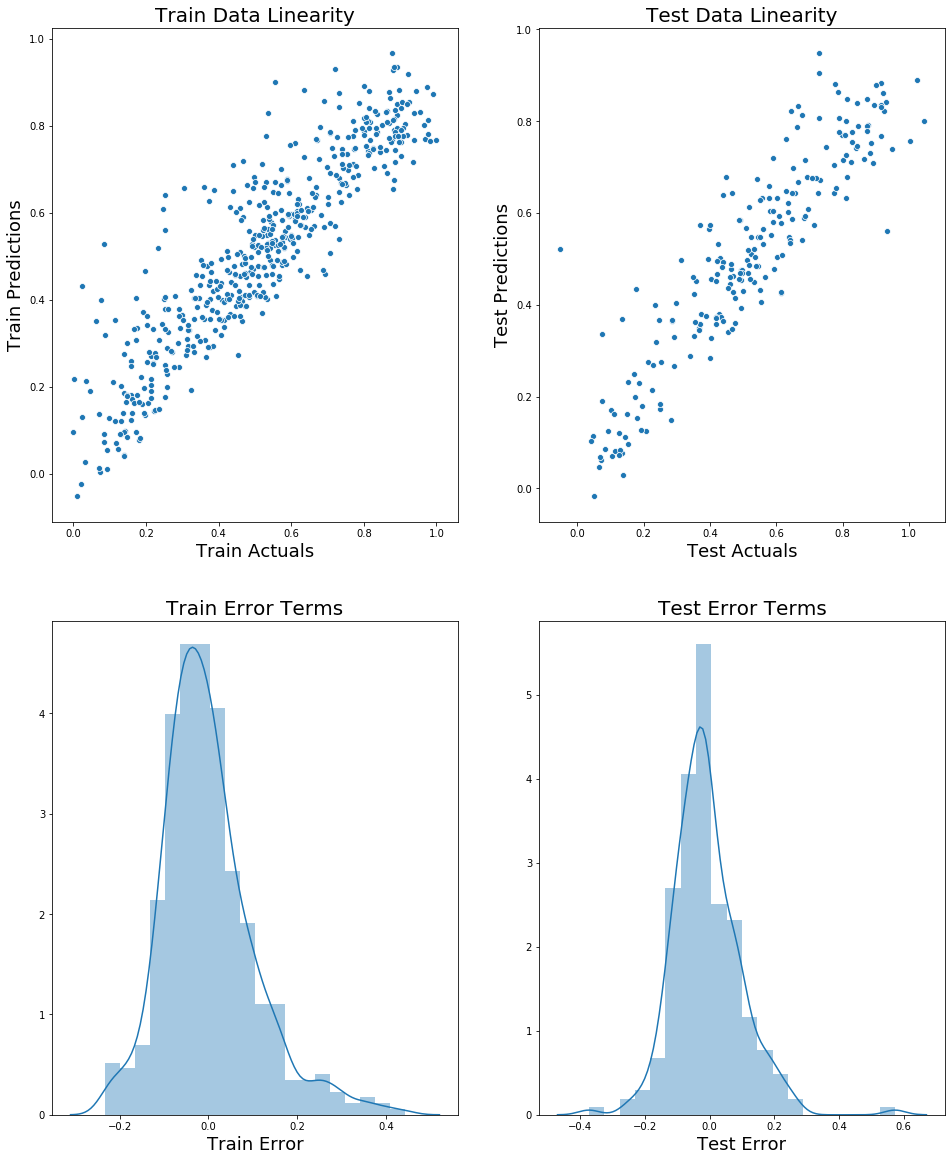

In [30]:
y_train_pred = lm.predict(bs_data_X_train[col_filter])
y_test_pred = lm.predict(bs_data_X_test[col_filter])

plt.figure(figsize=(16, 20))
plt.subplot(221)
sns.scatterplot(bs_data_y_train['cnt'], y_train_pred)
plt.title('Train Data Linearity', fontsize=20)
plt.xlabel('Train Actuals', fontsize=18)
plt.ylabel('Train Predictions', fontsize=18)

plt.subplot(222)
sns.scatterplot(bs_data_y_test['cnt'], y_test_pred)
plt.title('Test Data Linearity', fontsize=20)
plt.xlabel('Test Actuals', fontsize=18)
plt.ylabel('Test Predictions', fontsize=18)

plt.subplot(223)
sns.distplot((y_train_pred - bs_data_y_train['cnt']), bins=20)
plt.title('Train Error Terms', fontsize=20)
plt.xlabel('Train Error', fontsize=18)

plt.subplot(224)
sns.distplot((y_test_pred - bs_data_y_test['cnt']), bins=20)
plt.title('Test Error Terms', fontsize=20)
plt.xlabel('Test Error', fontsize=18)
plt.show()

### Linearity
The plot for actuals vs predictions for both test and train data confirm the linearity of the model.

### Normalization of Error Terms
The plot for the error terms show that the mean is centered about 0 and the error terms follow a normal distribution. 

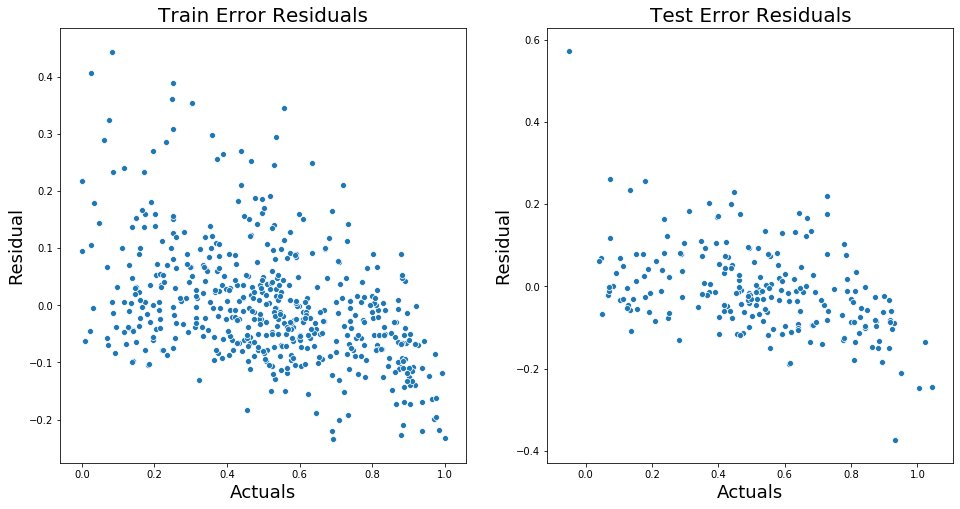

In [31]:
#Plotting the variance of residuals

plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.scatterplot(bs_data_y_train['cnt'], (y_train_pred - bs_data_y_train['cnt']))
plt.title('Train Error Residuals', fontsize=20)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Residual', fontsize=18)

plt.subplot(122)
sns.scatterplot(bs_data_y_test['cnt'], (y_test_pred - bs_data_y_test['cnt']))
plt.title('Test Error Residuals', fontsize=20)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Residual', fontsize=18)
plt.show()

#### Homoscedasticity
The train data predictions show that the model is overestimating for the lower values and underestimating for higher values.
This variance is a little better for the test data which mostly show that it underestimates the higher values.

### Check the Adjusted R-Square for both test and train data
#### We will use the r2_score function from sklearn for this.

In [32]:
from sklearn.metrics import r2_score
#R2 Score for train data
print("Train Data R2 Score:", r2_score(bs_data_y_train['cnt'], y_train_pred))
#R2 Score for test data
print("Test Data R2 Score:", r2_score(bs_data_y_test['cnt'], y_test_pred))

Train Data R2 Score: 0.8126895155535467
Test Data R2 Score: 0.8202746830155823


## Report the final model and conclusion
### Most Contributing Features
According to the linear regression analysis of the data, we found that the temperature, humidity and wind were the most contributing factor for the rentals. A high temperature seemed to drive up the rentals whereas humidity and windspeed act as a deterrant.<br/>
The other factors were also related to weather parameters, such as the seasons and the summer months.<br/>
The 3rd set of factors contributing to the rentals were workingday/weekend.<br/>

### In conclusion
1. Since most of the factors are weather related, the company cannot directly influence the features.
2. However the company could look into mitigating some of the factors to drive up the rentals, such as placement of bikes during weekdays and weekends.
3. They can also, try to discount the price around holidays or other non-favored seasons to mitigate the drop in rentals. <br/>
4. There could also be a factor of geographical locations for the bikes, which in conjuction to the weekdays of use may give another perspective. And that additional information may also help explain the skewness in the variance we see above.